# Function Optimization with Genetic Algorithms

## Purpose of the exercise
The aim of the exercise was to optimize derivative free optimization using Genetic Algorithms through the DEAP library. Derivative optimization is especially useful in cases where the objective $ f $ function is not available (black-box optimization) or in cases where it is, it is difficult or impractical to calculate its derivatives. For example, $ f $ may not be differentiable, its derivation may be difficult or time-consuming, $ f $ containing noise so that methods based on infinite differences are not effective or there are many local optimally among others.

## Functions for optimization

Each group corresponds to a non-scalable function, that is, it is defined for specific dimensions of the definition field) and a scalable (can be defined for any dimension D).

According to the file ["Groups - Functions"] (https://docs.google.com/spreadsheets/d/1g9otvvm1GIALF5c3Fsf45tULdoDZAmXnjmXysW4sbro/edit?usp=sharing) our team was asked to optimize the functions: <br>
115: Scahffer 4 Function <br>
122: Schwefel 2.20 Function
<br> <br>
Note that the function types were corrected based on the ["Errata in function definitions"] (https://drive.google.com/open?id=1MrRpq8q_hDfBZVw1CHBzC7t4biQkAftu3LEWXJMf6s0).

In [0]:
! pip install deap 

    100% |████████████████████████████████| 942kB 22.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built deap


## Part 1: Minimize the non-scalable Scahffer 4 Function

### Evaluation Criterion
Since the most important evaluation criterion is then to find the solution (here of the minimum value) with a higher average frequency in all rounds (avg_min), the function of evaluation is defined as the function we are studying to take advantage of the minimum value gets for each combination of parameters.

In [0]:
import warnings
import time
from deap import base, creator,tools,algorithms
from math import *
import numpy as np

warnings.filterwarnings("ignore")
lower_limit,upper_limit=-8,8
numVariables = 2

creator.create( "FitnessMin", base.Fitness , weights=(-1.0,))
creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, numVariables)
toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)

def evalF(indiv): 
  val=0.5+(cos(sin(abs(indiv[0]**2 - indiv[1]**2)))**2 - 0.5)/((1+0.001*(indiv[0]**2 + indiv[1]**2))**2)
  return(val,)
def evalFun(indiv): 
  val=0.5+(cos(sin(abs(indiv[0]**2 - indiv[1]**2)))**2 - 0.5)/((1+0.001*(indiv[0]**2 + indiv[1]**2))**2)
  return(val)

goal=0.292579
delta=0.001

In [0]:
MIN_BOUND = np.array([lower_limit]*numVariables)
MAX_BOUND = np.array([upper_limit]*numVariables)

def feasible( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

def distance( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = lower_limit - indiv [i]
        if ( indiv [i] > MAX_BOUND[i]) : penalty = indiv [i] - upper_limit
        dist = dist + penalty
    return dist
  
toolbox.register( "evaluate", evalF)
toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, 7, distance))

def FindMinInLogbook(logbook):
  return np.argmin(logbook.select("min")),min(logbook.select("min"))



def FindFirstGoodinLogbook(logbook,goal,delta):
  work=logbook.select("min")
  return  next(a for a,b in enumerate(work) if b <=goal+delta)
 
  
def TotalEvalsTillGood(logbook,goal,delta):
  index=FindFirstGoodinLogbook(logbook,goal,delta)
  return sum(logbook.select("nevals")[:index+1])
  

### Choosing the Right Genetic Algorithm

Each Genetic Algorithm is characterized by:
(a) its genetic operators, ie the definition of intersection, mutation and selection, and |
(b) the evolution strategy which determines the evolution of the population through the selection process and the probability of crossing and mutation.
<br>
The choice of the appropriate algorithm depends on each problem and its data, and for our own function we tested different combinations of operators and strategies. In particular, and according to the demands of the speech, the following operators were tested:

### a) Genetic operators
#### Cross Rope Operator:
Uniform (High = 0.6, Low = 0.1), Blend (High = 0.4, Low = 0)
#### Mutation operator:
Gaussian (High = 0.6, Low = 0.1), FlipBit (High = 0.6, Low = 0.1)
#### Selection operator:
selTournament, Roulette

Thus, the required 32 combinations of operators are generated.

### b) Development Strategies
For each combination of operators, we looked at the three following strategies as requested:
** Simple Genetic Algorithm **, ** "m + λ" **, ** "μ, λ" **.

In [0]:
######################################################
def mateU_low():
  toolbox.register("mate", tools.cxUniform,indpb=0.10)
def mateU_high():
  toolbox.register("mate", tools.cxUniform,indpb=0.60)
def mateB_low():
  toolbox.register("mate", tools.cxBlend,alpha=0)
def mateB_high():
  toolbox.register("mate", tools.cxBlend,alpha=0.4)

mates=[mateU_low,mateU_high,mateB_low,mateB_high]
name_mates=["Uniform_low","Uniform_high","Blend_low","Blend_high"]

######################################################
def mutateG_low():
  toolbox.register("mutate", tools.mutGaussian, mu=0.0 ,sigma=1.0,indpb=0.10)
def mutateF_low():
  toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
def mutateG_high():
  toolbox.register("mutate", tools.mutGaussian, mu=0.0 ,sigma=1.0,indpb=0.60)
def mutateF_high():
  toolbox.register("mutate", tools.mutFlipBit, indpb=0.60)
def mutShuffleIndexes_low():
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.10)
def mutShuffleIndexes_high():
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.60)
  
mutates2=[mutateG_low,mutShuffleIndexes_low,mutateG_high,mutShuffleIndexes_high]  
mutates=[mutateG_low,mutateF_low,mutateG_high,mutateF_high]
name_mutates=["Gaussian_low","FlipBit_low","Gaussian_high","Flipbit_high"]
name_mutates2=["Gaussian_low","mutShuffleIndexes_low","Gaussian_high","mutShuffleIndexes_high"]

######################################################
def selectT():
  toolbox.register("select", tools.selTournament, tournsize=100)
def selectR():
  toolbox.register("select", tools.selRoulette)
  
selects=[selectT,selectR]
name_selects=["Tournament","Roulette"]

####################################################
def ea_with_stats():
  pop = toolbox.population(n=Population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof

def ea_m_plus_l_withstats(m,l):
  pop = toolbox.population(n=Population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaMuPlusLambda(pop, toolbox,m,l, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof

def ea_m_comma_l_withstats(m,l):
  pop = toolbox.population(n=Population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaMuCommaLambda(pop, toolbox,m,l, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof

algorirthms=[ea_with_stats,ea_m_plus_l_withstats,ea_m_comma_l_withstats]

name_algorithms=["Simple","m+l","m,l"]
######################################################

#lo=[]
#Population=200
#ngen=150
#cxpb=0.02
#mutpb=0.02
#m=5
#l=15
#mateU_low()
#mutateG_low()
#selectT()
#p,lo,h=ea_m_comma_l_withstats()
#print(lo)


### Find optimal combination of strategies and strategies

To determine the most appropriate combination of strategy-operators, we initially set a relatively small number of rounds (eg 5-10) and maximum generations (eg 50-100-150) and fixed values ​​in population parameters and crossover probabilities and mutation.

As shown in the following cell, we made all the possible combinations using the toolbox, and for each combination, we calculate and store the values ​​of all the desired criteria, for each generation, and for each round, to find and present then the averages, on the basis of which we will decide the optimal combination afterwards.

In [0]:
%%capture

def mother(max_rounds,Population,ngen,cxpb,mutpb,mc,lc,mp,lp,goal,delta):
  #Population=Population
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  for i in range(96):
    #decide functions to be used
    #((i//32),(i//16)%2,(i//4)%4,i%4)
    
    funselect=selects[(i//16)%2]
    funmutates=mutates[(i//4)%4]
    funmates=mates[i%4]  
    funselect()
    funmutates()
    funmates()
    
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
      if ((i//32)==0):
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_with_stats()
        
      
      elif ((i//32)==1):
        
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_m_plus_l_withstats(mp,lp)
        
      elif ((i//32)==2):
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_m_comma_l_withstats(mc,lc)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    if (succs>0):
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
      
      
    
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals

arg1,arg2,arg3,arg4,arg5,arg6,arg7=mother(10,100,100,0.2,0.2,50,150,50,150,goal,delta)

#def mother(max_rounds,Population,ngen,cxpb,mutpb,mc,lc,mp,lp,goal,delta):
    

In the following ** table **, the values of ** relative ** (avg.min, success avg. Min, success avg. Evals) and ** absolute criteria are shown ** (avg.min, avg.evals, avg.time) requested to be reviewed, for the 32 combinations of operators, in combination with the 3 strategies, ** classified as avg_min **.

In [0]:
from prettytable import PrettyTable
table2=PrettyTable()
table2.field_names=["algorithm","mate","mutate","select","avg_min","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(96):
  table2.add_row([name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[(i//16)%2],arg1[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])

table2.sortby="avg_min"

print(table2)
#0.292579


+-----------+--------------+---------------+------------+---------------------+-----------+--------------------+-------+--------------------+---------------------+--------------------+
| algorithm |     mate     |     mutate    |   select   |       avg_min       | avg_evals |      avg_time      | succs |   succs_avg_gen    |    succs_avg_min    |  succs_avg_evals   |
+-----------+--------------+---------------+------------+---------------------+-----------+--------------------+-------+--------------------+---------------------+--------------------+
|    m,l    | Uniform_high | Gaussian_high | Tournament |  0.2927706853265485 |   1094.0  | 1.462363839149475  |   10  |        51.1        | 0.29319045141529504 |       503.4        |
|    m+l    | Uniform_high | Gaussian_high | Tournament |  0.2927710439673337 |   1102.0  | 1.393413257598877  |   10  |        45.1        | 0.29322195844404464 |       458.8        |
|   Simple  | Uniform_low  | Gaussian_high | Tournament |  0.29278245352150

In general, we observed that in each execution, even with the same parameters, the metrics for each combination of operators and strategy varied to the 3rd decimal place, thus changing their ranking based on the avg_min criterion, which means that the combinations are just as good for our service.
<br> <br>
Finally, we decided that the most appropriate is the following combination: <br>
- ** development strategy: ** μ, λ
- ** crossover operator: ** unifrom low, <br>
- ** Mutation mutation: ** gaussian high, <br>
- ** selection operator: ** select Tournament
<br>
Since, after many executions, he remained at the top of the combinations, maintaining a good combination of avg_min and success_avg_min.

### Optimization of crossover and mutation probabilities
Then, we searched for the best combination of cxpb and mutpb.

For the best combination of the above-mentioned strategy strategies and a constant number of rounds, population and generations, we performed grid search on the probabilities of the intersection and mutation operators in [0.05 0.9] as requested by the speech to find the optimal combination.

Gradually, as shown in the following 2 tables, based on the results we received, we tested smaller range of price ranges around good values ​​in order to increase the accuracy of the minimum we reach.

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
from itertools import product
selectT()
mateU_low()
mutateG_high()
mutpb=[x/100 for x in range(5,95,10) ]
cxpb=mutpb
grid_search=[(a,b)  for a in mutpb for b in cxpb if (a+b<=1.0)]
  #print(grid_search)
def ea_m_comma_l_withstats(m,l,population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaMuCommaLambda(pop, toolbox,m,l, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,population,ngen,mc,lc,goal,delta,grid_search):

 
  
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  for pair in grid_search:
    mutpb=pair[0]
    cxpb=pair[1]
   
      
    
    
    
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,_=ea_m_comma_l_withstats(mc,lc,population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    if (succs>0):
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals

arg1,arg2,arg3,arg4,arg5,arg6,arg7=best(5,150,100,50,150,goal,delta,grid_search)
#def best(max_rounds,population,ngen,mc,lc,goal,delta,grid_search):



In [0]:

from prettytable import PrettyTable
tableOpt=PrettyTable()
tableOpt.field_names=["mutpb","cxpb","avg_min","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt.add_row([grid_search[i][0],grid_search[i][1],arg1[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt.sortby="avg_min"
print(tableOpt)



+-------+------+---------------------+-----------+--------------------+-------+---------------+---------------------+-----------------+
| mutpb | cxpb |       avg_min       | avg_evals |      avg_time      | succs | succs_avg_gen |    succs_avg_min    | succs_avg_evals |
+-------+------+---------------------+-----------+--------------------+-------+---------------+---------------------+-----------------+
|  0.45 | 0.15 | 0.29258254663794286 |   9138.0  | 1.4237924575805665 |   5   |      7.8      | 0.29326043667301327 |      764.6      |
|  0.25 | 0.55 |  0.2925827159472682 |  12159.0  | 1.6986786365509032 |   5   |      14.2     | 0.29315206277239664 |      1733.8     |
|  0.75 | 0.05 |  0.2925837260087435 |  12132.0  | 1.5482515335083007 |   5   |      4.0      | 0.29315559754485443 |      510.0      |
|  0.45 | 0.35 |  0.2925837989861094 |  12150.0  | 1.778890609741211  |   5   |      6.8      | 0.29295265145516813 |      840.2      |
|  0.55 | 0.45 | 0.29258391875331724 |  15150.0 

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
#optimized grid search
from itertools import product
selectT()
mateU_low()
mutateG_high()
mutpb=[x/100 for x in range(64,78,2) ]
cxpb=[x/100 for x in range(5,20,3) ]
grid_search=[(a,b)  for a in mutpb for b in cxpb if (a+b<=1.0)]
  #print(grid_search)
def ea_m_comma_l_withstats(m,l,population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaMuCommaLambda(pop, toolbox,m,l, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,population,ngen,mc,lc,goal,delta,grid_search):

 
  
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  for pair in grid_search:
    mutpb=pair[0]
    cxpb=pair[1]
   
      
    
    
    
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,_=ea_m_comma_l_withstats(mc,lc,population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    if (succs>0):
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals

arg1,arg2,arg3,arg4,arg5,arg6,arg7=best(10,150,100,50,150,goal,delta,grid_search)
#def best(max_rounds,population,ngen,mc,lc,goal,delta,grid_search):


In [0]:

from prettytable import PrettyTable
tableOpt2=PrettyTable()
tableOpt2.field_names=["mutpb","cxpb","avg_min","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt2.add_row([grid_search[i][0],grid_search[i][1],arg1[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt2.sortby="avg_min"
print(tableOpt2)



+-------+------+---------------------+-----------+--------------------+-------+---------------+---------------------+-----------------+
| mutpb | cxpb |       avg_min       | avg_evals |      avg_time      | succs | succs_avg_gen |    succs_avg_min    | succs_avg_evals |
+-------+------+---------------------+-----------+--------------------+-------+---------------+---------------------+-----------------+
|  0.68 | 0.08 | 0.29258065374278563 |  11534.0  |  1.64842746257782  |   10  |      4.0      |  0.2929796407648233 |      487.0      |
|  0.66 | 0.08 |  0.2925809501718615 |  11268.0  | 1.508044695854187  |   10  |      4.7      |  0.2930196288182424 |      561.5      |
|  0.76 | 0.17 |  0.2925817720020764 |  14107.0  | 1.6759021520614623 |   10  |      4.1      | 0.29308293267558566 |      584.1      |
|  0.72 | 0.17 |  0.2925820741004044 |  13491.0  | 1.6492798805236817 |   10  |      5.9      |  0.2929896909161209 |      802.1      |
|  0.76 | 0.05 |  0.2925831439451497 |  12287.0 

According to the avg_min evaluation criterion, which is most important, we have come to the following combination of probabilities: <br>
- ** probability of crossing: ** 0.08 <br>
- ** probability of mutation: ** 0.68

### Presentation of the optimal (minimum) price of our service
As shown in the following cell, where we ran the optimal algorithm that resulted in the previous steps for 4000 generations and a population of 1000, and, as we have seen, we received the following minimum value: 0.2925786320538822 in just over 4 minutes. In fact, we deduced that the given minimum value we originally used from the paper of the speech (0.2925786328424814) is greater than that we found, meaning it was found by rounding.

In [0]:
def ea_m_comma_l_withstats(m,l,population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaMuCommaLambda(pop, toolbox,m,l, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=False)
  return pop, logbook, hof

#κρατάμε mut 0.68 cx 0.08
selectT()
mateU_low()
mutateG_high()
mutpb=0.68
cxpb=0.08
start=time.time()
pop,logs,hof=ea_m_comma_l_withstats(100,1000,1000,4000,mutpb,cxpb)
end=time.time()-start
print("minimum value is:",min(logs.select("min")),"while actual value is ",evalFun((0,1.253115)),"\n time elapsed:",end,"s   \n total number of evaluations:",sum(logs.select("nevals")))

minimum value is: 0.2925786320538822 while actual value is  0.2925786328424814 
 time elapsed: 248.90558338165283 s   
 total number of evaluations: 3042413


## Part 2: Minimize the non-escalating Schwefel 2.20 Function

### For D = 2
As shown below, we printed the 3D graph of the given function.
Obviously, by the type of function alone, and as confirmed by its graph, the total minimum is 0, while the function is continuous everywhere, defined for each x, and has a range of values: [0, + infinity].

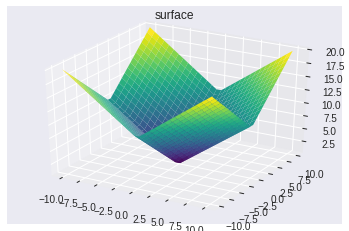

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def function2(D):
  b= [(abs(x)) for x in D]
  return sum(b)
def function2eval(D):
  b= [(abs(x)) for x in D]
  return (sum(b),)
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
Z = function2([X,Y])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


### Evaluation Criterion
Following the same procedure as Part 1:
Since the most important evaluation criterion is then to find the solution (here of the minimum value) with a higher average frequency in all rounds (avg_min), the function of evaluation is defined as the function we are studying to take advantage of the minimum value gets for each combination of parameters.

In [0]:
numVariables,lower_limit,upper_limit=2,-20,20


creator.create( "FitnessMin", base.Fitness , weights=(-1.0,))
creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, numVariables)
toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)

MIN_BOUND = np.array([lower_limit]*numVariables)
MAX_BOUND = np.array([upper_limit]*numVariables)

def feasible( indiv ):
    if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
        return False
    return True

def distance( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = lower_limit - indiv [i]
        if ( indiv [i] > MAX_BOUND[i]) : penalty = indiv [i] - upper_limit
        dist = dist + penalty
    return dist
  
toolbox.register( "evaluate", function2eval)
toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, 12, distance))

##########



### Choosing the Right Genetic Algorithm

### a) Genetic operators
#### Cross Rope Operator:
Uniform (High = 0.6, Low = 0.1), Blend (High = 0.4, Low = 0)
#### Mutation operator:
Gaussian (High = 0.6, Low = 0.1), ShuffleIndexes (High = 0.6, Low = 0.1)
#### Selection operator:
selTournament, Roulette

Note that for this function we did not use the FlipBit mutation operator because we know that the minimum minimum is 0, and FlipBit by its nature would give it immediately by negating the value of the exercise. That's why we used ShuffleIndexes. Operators for Part 2 also appear in the corresponding part of Part 1.

Thus, the required 32 combinations of operators are generated.

### b) Development Strategies
For each combination of operators, we looked at the three following strategies as requested:
** Simple Genetic Algorithm **, ** "m + λ" **, ** "μ, λ" **.

### Find optimal combination of strategies and strategies

To determine the most appropriate combination of strategy-operators, we initially set a relatively small number of rounds (eg 5-10) and maximum generations (eg 50-100-150) and fixed values ​​in population parameters and crossover probabilities and mutation.

As shown in the following cell, we made all the possible combinations using the toolbox, and for each combination, we calculate and store the values ​​of all the desired criteria, for each generation, and for each round, to find and present then the averages, on the basis of which we will decide the optimal combination afterwards.

In [0]:
%%capture

def mother(max_rounds,Population,ngen,cxpb,mutpb,mc,lc,mp,lp,goal,delta):
  Population=Population
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  for i in range(96):
    #decide functions to be used
    #((i//32),(i//16)%2,(i//4)%4,i%4)
    
    funselect=selects[(i//16)%2]
    funmutates=mutates2[(i//4)%4]
    funmates=mates[i%4]  
    funselect()
    funmutates()
    funmates()
    
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
      if ((i//32)==0):
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_with_stats()
        
      
      elif ((i//32)==1):
        
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_m_plus_l_withstats(mp,lp)
        
      elif ((i//32)==2):
        #print(name_algorithms[i//32],name_mates[i%4],name_mutates[(i//4)%4],name_selects[i//16])
        _,logs,_=ea_m_comma_l_withstats(mc,lc)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    if (succs>0):
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
      
      
    
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals

arg1,arg2,arg3,arg4,arg5,arg6,arg7=mother(10,100,100,0.2,0.2,50,100,50,50,0,0.4)

#def mother(max_rounds,Population,ngen,cxpb,mutpb,mc,lc,mp,lp,goal,delta):
    

In the following ** table **, the values of ** relative ** (avg.min, success avg. Min, success avg. Evals) and ** absolute criteria are shown ** (avg.min, avg.evals, avg.time) requested to be reviewed, for the 32 combinations of operators, in combination with the 3 strategies, ** classified as avg_min **.

In [0]:
from prettytable import PrettyTable
table2D=PrettyTable()
table2D.field_names=["algorithm","mate","mutate","select","avg_min","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(96):
  table2D.add_row([name_algorithms[i//32],name_mates[i%4],name_mutates2[(i//4)%4],name_selects[(i//16)%2],arg1[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])

table2D.sortby="avg_min"

print(table2D)

+-----------+--------------+------------------------+------------+----------------------+-----------+--------------------+-------+--------------------+-----------------------+-------------------+
| algorithm |     mate     |         mutate         |   select   |       avg_min        | avg_evals |      avg_time      | succs |   succs_avg_gen    |     succs_avg_min     |  succs_avg_evals  |
+-----------+--------------+------------------------+------------+----------------------+-----------+--------------------+-------+--------------------+-----------------------+-------------------+
|   Simple  |  Blend_high  |     Gaussian_high      | Tournament | 0.012285400931601858 |   1366.0  | 5.873555541038513  |   10  |        7.2         |   0.253718279037206   |       244.5       |
|   Simple  |  Blend_low   |     Gaussian_high      | Tournament | 0.013197961516497816 |   1368.0  | 5.766512417793274  |   10  |        6.8         |  0.27380930439049156  |       245.4       |
|   Simple  |  Blend

Again, we observed that in each execution, even with the same parameters, the metrics for each combination of operators and strategy varied to the 3rd decimal place and consequently changed their ranking based on the avg_min criterion, which means combinations are just as good for our service.
<br> <br>
Finally, we decided that the most appropriate is the following combination: <br>
- ** evolution strategy: ** Simple <br>
- ** switching power: ** blend high, <br>
- ** Mutation mutation: ** gaussian high, <br>
- ** selection operator: ** select Tournament
<br>
Since, after many executions, he remained at the top of the combinations, maintaining a good combination of avg_min and success_avg_min.

### Optimization of crossover and mutation probabilities
Then, we searched for the best combination of cxpb and mutpb.

For the best combination of the above-mentioned strategy strategies and a constant number of rounds, population and generations, we performed grid search on the probabilities of the intersection and mutation operators in [0.05 0.9] as requested by the speech to find the optimal combination.

Gradually, as shown in the following 2 tables, based on the results we received, we tested smaller range of price ranges around good values ​​in order to increase the accuracy of the minimum we reach.

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : simple blend_high,gaussian high,select Tournament
#optimized grid search
from itertools import product
selectT()
mateB_high()
mutateG_high()
mutpb=[x/100 for x in range(30,42,2) ]
cxpb=[x/100 for x in range(35,60,5) ]
grid_search=[(a,b)  for a in mutpb for b in cxpb if (a+b<=1.0)]
  #print(grid_search)
def ea_with_stats(population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  #stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,population,ngen,goal,delta,grid_search):

 
  
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  for pair in grid_search:
    mutpb=pair[0]
    cxpb=pair[1]
    
      
    
    
    
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      
      start=time.time()
      
      _,logs,_=ea_with_stats(population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    if (succs>0):
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals

arg1,arg2,arg3,arg4,arg5,arg6,arg7=best(10,100,100,0,0.015,grid_search)
#def best(max_rounds,population,ngen,goal,delta,grid_search):


In [0]:

from prettytable import PrettyTable
tableOpt3=PrettyTable()
tableOpt3.field_names=["mutpb","cxpb","avg_min","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt3.add_row([grid_search[i][0],grid_search[i][1],arg1[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt3.sortby="avg_min"
print(tableOpt3)

+-------+------+------------------------+-----------+--------------------+-------+---------------+----------------------+-----------------+
| mutpb | cxpb |        avg_min         | avg_evals |      avg_time      | succs | succs_avg_gen |    succs_avg_min     | succs_avg_evals |
+-------+------+------------------------+-----------+--------------------+-------+---------------+----------------------+-----------------+
|  0.3  | 0.55 | 0.00021478105786407672 |   6945.0  | 2.080982708930969  |   10  |      11.3     | 0.009953727366592531 |      807.0      |
|  0.3  | 0.5  | 0.0003285996692232291  |   6620.0  | 2.071770930290222  |   10  |      10.5     | 0.007661849507086559 |      714.3      |
|  0.34 | 0.45 | 0.0003440248750479826  |   6475.0  | 2.070434904098511  |   10  |      10.7     | 0.00939315140770824  |      720.7      |
|  0.4  | 0.55 | 0.0003890825715553439  |   7428.0  | 2.092874026298523  |   10  |      7.4      | 0.007175928712640245 |      577.6      |
|  0.4  | 0.45 | 0.0

According to the avg_min evaluation criterion, which is most important, we have come to the following combination of probabilities: <br>
- ** probability of crossing: ** 0.55 <br>
- ** probability of mutation: ** 0.3

### For D = 1, 10, 20, 40 and larger dimensions

For the optimal algorithm we found for D = 2 dimensions (strategy: simple, parameters high: gaussian high, select tournament), we performed grid search for the required dimensions. The results, based on the required criteria, are shown in a table below.

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
# βέλτιστες παράμετροι mutpb=0.3 , cxpb=0.55
selectT()
mateB_high()
mutateG_high()
mutpb=0.3
cxpb=0.55
grid_search=[1,10,20,40,60]
  #print(grid_search)
def ea_with_stats(population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,population,ngen,goal,delta,grid_search):

  
  lower_limit,upper_limit=-20,20
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  big_min=[]
  for D in grid_search:
    delta=delta*(D**(3/2))
    toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
    toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
    toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)
      
      
      
      
    MIN_BOUND = np.array([lower_limit]*D)
    MAX_BOUND = np.array([upper_limit]*D)

    def feasible( indiv ):
        if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
            return False
        return True

    def distance( indiv ) :
        dist = 0.0
        for i in range (len( indiv )) :
            penalty = 0
            if ( indiv [i] < lower_limit) : penalty = lower_limit - indiv [i]
            if ( indiv [i] > upper_limit) : penalty = indiv [i] - upper_limit
            dist = dist + penalty
        return dist


    toolbox.register( "evaluate", function2eval)
    toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, D**(1/4), distance))
##########
    
      
    
    
    min_min=10000
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,hof=ea_with_stats(population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      if ((min(logs.select("min"))) < min_min):
        min_min=min(logs.select("min"))
      
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    big_min.append(min_min)
    if (succs>0):
      
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals,logs,big_min

arg1,arg2,arg3,arg4,arg5,arg6,arg7,logs,hall=best(10,300,100,0,0.005,grid_search)
#def best(max_rounds,population,ngen,goal,delta,grid_search):



In order to better monitor the results, we also printed the best price.

#### a) Comment on table results.
For individuals by default, we defined several delta values ​​and observed the following: For values ​​delta proportional to the number of dimensions (eg 2 * D), in a large number of dimensions the value of avg_min had no relation to the desired minimum result (0). Indeed, we noticed that it was little different from the delta. Obviously, in cases where we defined the delta inversely proportional to the dimensions, the result faster (in generations and rounds) converges to the desired one. Seeing how much the result is affected by the penalty, we finally set it to D ^ (1/4), where for a small number of generations and rounds we get modest results.

#### b) What do you think are the causes of the phenomenon?
For larger dimensions, it makes sense that the values ​​are larger if our function is a sum of individual "independent" variables and ideally should be minimized all, which is statistically more difficult than smaller dimensions.

#### c) For a consistent number of generations, how can we improve the results in large dimensions to the average optimal value arm?

For a fixed number of generations, we can improve the results by increasing the population (there is saturation after one point). Below we give results for different populations.

In [0]:

from prettytable import PrettyTable
tableOpt4=PrettyTable()
tableOpt4.field_names=["Dimensions","avg_min","best value","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt4.add_row([grid_search[i],arg1[i],hall[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt4.sortby="avg_min"
print(tableOpt4)


+------------+------------------------+------------------------+-----------+-------------------+-------+---------------+-----------------------+-----------------+
| Dimensions |        avg_min         |       best value       | avg_evals |      avg_time     | succs | succs_avg_gen |     succs_avg_min     | succs_avg_evals |
+------------+------------------------+------------------------+-----------+-------------------+-------+---------------+-----------------------+-----------------+
|     1      | 2.3887723355245347e-07 | 5.530963290360847e-124 |  20836.0  | 6.374990963935852 |   10  |      2.5      | 0.0012773886219639113 |      610.9      |
|     10     |   1.7785134665312063   |   1.7782794104754873   |  20815.0  | 6.886827659606934 |   0   |      None     |          None         |       None      |
|     20     |   2.1148072496678787   |   2.1147425269087328   |  20878.0  | 7.355727863311768 |   10  |      2.0      |   2.180968055703175   |      507.0      |
|     40     |   2.515

### Optimization in large dimensions


* 1: Select D = 20 and increase the population gradually

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
# βέλτιστες παράμετροι mutpb=0.3 , cxpb=0.55
selectT()
mateB_high()
mutateG_high()
mutpb=0.3
cxpb=0.55
D=20
grid_search=[50,100,200,400,800,1200]
  #print(grid_search)
def ea_with_stats(population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,ngen,goal,delta,grid_search):

  
  lower_limit,upper_limit=-20,20
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  big_min=[]
  for population in grid_search:
    #delta=delta*D
    toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
    toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
    toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)
      
      
      
      
    MIN_BOUND = np.array([lower_limit*D]*D)
    MAX_BOUND = np.array([upper_limit*D]*D)

    def feasible( indiv ):
        if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
            return False
        return True

    def distance( indiv ) :
        dist = 0.0
        for i in range (len( indiv )) :
            penalty = 0
            if ( indiv [i] < lower_limit) : penalty = lower_limit - indiv [i]
            if ( indiv [i] > upper_limit) : penalty = indiv [i] - upper_limit
            dist = dist + penalty
        return dist


    toolbox.register( "evaluate", function2eval)
    toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, D**(1/4), distance))
##########
    
      
    
    
    min_min=10000
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,hof=ea_with_stats(population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      if ((min(logs.select("min"))) < min_min):
        min_min=min(logs.select("min"))
      
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    big_min.append(min_min)
    if (succs>0):
      
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals,logs,big_min

arg1,arg2,arg3,arg4,arg5,arg6,arg7,logs,hall=best(10,200,0,0.11,grid_search)
#def best(max_rounds,ngen,goal,delta,grid_search):



In [0]:
print(grid_search)
from prettytable import PrettyTable
tableOpt4=PrettyTable()
tableOpt4.field_names=["population","avg_min","best value","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt4.add_row([grid_search[i],arg1[i],hall[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt4.sortby="population"
print(tableOpt4)


[50, 100, 200, 400, 800, 1200]
+------------+----------------------+------------------------+-----------+--------------------+-------+--------------------+---------------------+--------------------+
| population |       avg_min        |       best value       | avg_evals |      avg_time      | succs |   succs_avg_gen    |    succs_avg_min    |  succs_avg_evals   |
+------------+----------------------+------------------------+-----------+--------------------+-------+--------------------+---------------------+--------------------+
|     50     |  5.608714972055771   |   3.0728217109632356   |   6886.0  | 2.348699140548706  |   0   |        None        |         None        |        None        |
|    100     |  3.7549151597593644  |   1.9319242250738593   |  13774.0  | 4.692396545410157  |   0   |        None        |         None        |        None        |
|    200     |  3.5008676697818215  |   1.0199419266474108   |  27607.0  | 9.440105557441711  |   0   |        None        |     

### Optimization in large dimensions


* 2: Select D = 10 and print parameters and a number of successes. Then we decrease the delta but we increase the success rate and show what parameter changes this is.

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
# βέλτιστες παράμετροι mutpb=0.3 , cxpb=0.55
selectT()
mateB_high()
mutateG_high()
mutpb=0.3
cxpb=0.55
grid_search=[10]
  #print(grid_search)
def ea_with_stats(population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,population,ngen,goal,delta2,grid_search):

  delta=delta2
  lower_limit,upper_limit=-20,20
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  big_min=[]
  for D in grid_search:
    delta2=delta*D
    toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
    toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
    toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)
      
      
      
      
    MIN_BOUND = np.array([lower_limit*D]*D)
    MAX_BOUND = np.array([upper_limit*D]*D)

    def feasible( indiv ):
        if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
            return False
        return True

    def distance( indiv ) :
        dist = 0.0
        for i in range (len( indiv )) :
            penalty = 0
            if ( indiv [i] < lower_limit) : penalty = lower_limit - indiv [i]
            if ( indiv [i] > upper_limit) : penalty = indiv [i] - upper_limit
            dist = dist + penalty
        return dist


    toolbox.register( "evaluate", function2eval)
    toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, D**(1/4), distance))
##########
    
      
    
    
    min_min=10000
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,hof=ea_with_stats(population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      if ((min(logs.select("min"))) < min_min):
        min_min=min(logs.select("min"))
      
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    big_min.append(min_min)
    if (succs>0):
      
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals,logs,big_min

population=400
ngen=100
max_rounds=30
delta=0.005
arg1,arg2,arg3,arg4,arg5,arg6,arg7,logs,hall=best(max_rounds,population,ngen,0,delta,grid_search)
#def best(max_rounds,population,ngen,goal,delta,grid_search):

In [0]:

from prettytable import PrettyTable
tableOpt4=PrettyTable()
tableOpt4.field_names=["Dimensions","avg_min","best value","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt4.add_row([grid_search[i],arg1[i],hall[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt4.sortby="avg_min"
print(" population is:",population,"\n number of generations:",ngen,"\n delta:",delta,"\n",tableOpt4)


 population is: 400 
 number of generations: 100 
 delta: 0.005 
 +------------+---------------------+-----------------------+-----------+-------------------+-------+---------------+----------------------+-----------------+
| Dimensions |       avg_min       |       best value      | avg_evals |      avg_time     | succs | succs_avg_gen |    succs_avg_min     | succs_avg_evals |
+------------+---------------------+-----------------------+-----------+-------------------+-------+---------------+----------------------+-----------------+
|     10     | 0.05329297696313288 | 0.0002852372095878189 |  27783.0  | 8.868665178616842 |   6   |      23.0     | 0.004199198791069268 |      6469.0     |
+------------+---------------------+-----------------------+-----------+-------------------+-------+---------------+----------------------+-----------------+


Initially we have the above parameters with 6/30 hits. We reduce the delta by half and try to increase the population.

In [0]:
%%capture
# από τα παραπάνω καταλήγουμε στον εξής συνδυασμό : m,l unifrom low,gaussian high,select Tournament
# βέλτιστες παράμετροι mutpb=0.3 , cxpb=0.55
selectT()
mateB_high()
mutateG_high()
mutpb=0.3
cxpb=0.55
D=10
grid_search=[400,800,1200,1600]
  #print(grid_search)
def ea_with_stats(population,ngen,mutpb,cxpb):
  pop = toolbox.population(n=population)
  hof = tools.HallOfFame(1)
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  #stats.register("avg", np.mean)
  stats.register("min", np.min)
  stats.register("max", np.max)
  pop,logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof,verbose=True)
  return pop, logbook, hof



def best(max_rounds,ngen,goal,delta,grid_search):

  
  lower_limit,upper_limit=-20,20
  big_avg_min=[]
  big_avg_evals=[]
  big_avg_time=[]
  big_succs=[]
  big_succs_avg_gen=[]
  big_succs_avg_min=[]
  big_succs_avg_evals=[]
  big_min=[]
  for population in grid_search:
    #delta=delta*D
    toolbox.register( "InitialValue", np.random.uniform, lower_limit,upper_limit)
    toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
    toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)
      
      
      
      
    MIN_BOUND = np.array([lower_limit*D]*D)
    MAX_BOUND = np.array([upper_limit*D]*D)

    def feasible( indiv ):
        if any( indiv < MIN_BOUND) or any( indiv > MAX_BOUND):
            return False
        return True

    def distance( indiv ) :
        dist = 0.0
        for i in range (len( indiv )) :
            penalty = 0
            if ( indiv [i] < lower_limit) : penalty = lower_limit - indiv [i]
            if ( indiv [i] > upper_limit) : penalty = indiv [i] - upper_limit
            dist = dist + penalty
        return dist


    toolbox.register( "evaluate", function2eval)
    toolbox.decorate( "evaluate", tools.DeltaPenalty (feasible, D**(1/4), distance))
##########
    
      
    
    
    min_min=10000
    avg_min=[]
    avg_evals=[]
    avg_time=[]
    succs_avg_min=[]
    succs_avg_gen=[]
    succs_avg_evals=[]
    succs=0
    
    for rounds in range(max_rounds):
      start=time.time()
     
      _,logs,hof=ea_with_stats(population,ngen,mutpb,cxpb)
        
        
      avg_time.append(time.time()-start)  
      avg_min.append(min(logs.select("min")))
      avg_evals.append(sum(logs.select("nevals")))
      if ((min(logs.select("min"))) < min_min):
        min_min=min(logs.select("min"))
      
      
      if ((min(logs.select("min")))<=goal+delta):
        
        succs=succs+1
        succs_avg_gen.append(FindFirstGoodinLogbook(logs,goal,delta)+1)
        succs_avg_min.append(logs.select("min")[FindFirstGoodinLogbook(logs,goal,delta)])
        succs_avg_evals.append(TotalEvalsTillGood(logs,goal,delta))
    
    big_avg_time.append(sum(avg_time)/float(len(avg_time)))
    big_avg_min.append(sum(avg_min)/float(len(avg_min)))
    big_avg_evals.append((sum(avg_evals)//float(len(avg_evals))))
    big_min.append(min_min)
    if (succs>0):
      
      big_succs.append(succs)
      big_succs_avg_gen.append((sum(succs_avg_gen)/succs))
      big_succs_avg_min.append((sum(succs_avg_min)/succs))
      big_succs_avg_evals.append((sum(succs_avg_evals)/succs))
    else:
      big_succs.append(succs)
      big_succs_avg_gen.append("None")
      big_succs_avg_min.append("None")
      big_succs_avg_evals.append("None")
  return big_avg_min,big_avg_evals,big_avg_time,big_succs,big_succs_avg_gen,big_succs_avg_min,big_succs_avg_evals,logs,big_min


ngen=100
max_rounds=30
delta=0.0025
arg1,arg2,arg3,arg4,arg5,arg6,arg7,logs,hall=best(max_rounds,ngen,0,delta,grid_search)
#def best(max_rounds,population,ngen,goal,delta,grid_search):


In [0]:

from prettytable import PrettyTable
tableOpt5=PrettyTable()
tableOpt5.field_names=["population","avg_min","best value","avg_evals","avg_time","succs","succs_avg_gen","succs_avg_min","succs_avg_evals"]
for i in range(len(grid_search)):
  tableOpt5.add_row([grid_search[i],arg1[i],hall[i],arg2[i],arg3[i],arg4[i],arg5[i],arg6[i],arg7[i]])
tableOpt5.sortby="population"
print("number of generations:",ngen,"\n delta:",delta,"\n",tableOpt5)

number of generations: 100 
 delta: 0.0025 
 +------------+-----------------------+------------------------+-----------+--------------------+-------+--------------------+-----------------------+--------------------+
| population |        avg_min        |       best value       | avg_evals |      avg_time      | succs |   succs_avg_gen    |     succs_avg_min     |  succs_avg_evals   |
+------------+-----------------------+------------------------+-----------+--------------------+-------+--------------------+-----------------------+--------------------+
|    400     |  0.06713486327723123  | 1.3439717494339393e-05 |  27792.0  | 8.894477423032125  |   5   |        27.6        |  0.002195017717233416 |       7667.6       |
|    800     |  0.016597852612130978 | 2.9175841463834542e-18 |  55599.0  | 17.889850044250487 |   22  | 19.90909090909091  | 0.0019845114760347355 | 11182.363636363636 |
|    1200    | 0.0013303589617155412 | 1.979416739468463e-23  |  83380.0  | 27.36179501215617  |   2

Finally, we notice that by increasing the population, we manage to reduce the value of matching to desirable levels. Note here that if we deduct the number of generations we did not notice any significant difference (> 200) as there was a saturation in the performance of the method.